In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('gdrive/My Drive/Colab Notebooks/train_ld.csv')
test = pd.read_csv('gdrive/My Drive/Colab Notebooks/test_ld.csv')

In [3]:
ss = pd.read_csv('gdrive/My Drive/Colab Notebooks/sample_submission_Loan_predict.csv')

In [4]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True,sort=True)

**Data Exploration**

In [5]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [6]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

we can see some variables ('Credit_History','Dependents','LoanAmount','Loan_Amount_Term',
'Married','Self_Employed') have missing values

**Distribution Analysis**

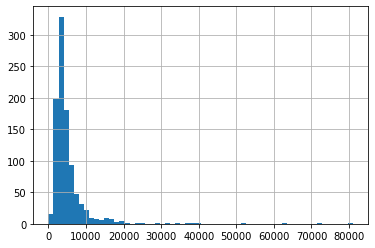

In [7]:
data['ApplicantIncome'].hist(bins=60)

Here, we can see there are few extreme valuee, basically they are outliers.

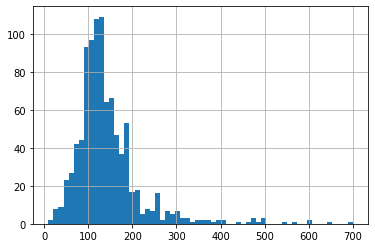

In [8]:
data['LoanAmount'].hist(bins=60)

It also contains outliers

In [9]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

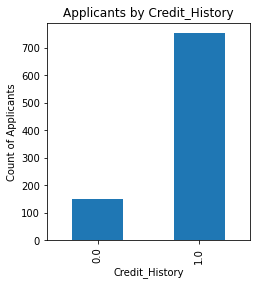

In [10]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan by credit history')

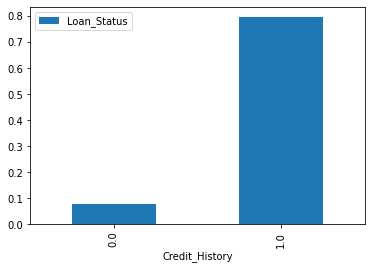

In [11]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history



---



In [12]:
temp1 = data['Married'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

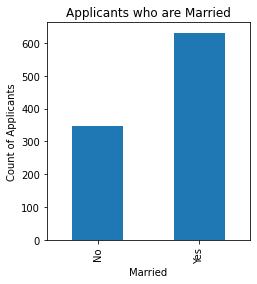

In [13]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants who are Married")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan if married')

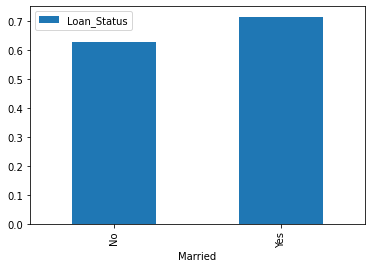

In [14]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Married')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan if married")

From here we can conclude that loan status is not much affected whether applicant is married or not





---




In [15]:
temp1 = data['Self_Employed'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

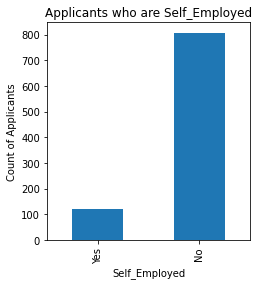

In [16]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants who are Self_Employed")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan if Self_Employed')

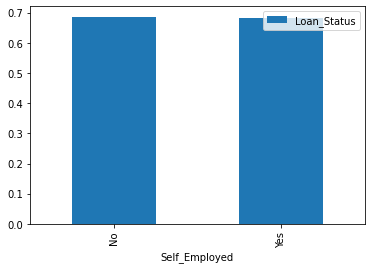

In [17]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Self_Employed')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan if Self_Employed")

From here also, we can conclude that loan status is not dependent on self employed status



---



In [18]:
temp1 = data['Gender'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

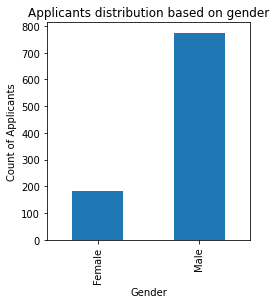

In [19]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants distribution based on gender")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan based on gender')

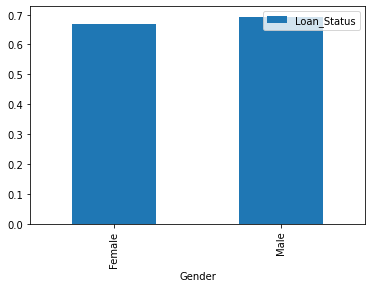

In [20]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan based on gender")

One can conclude that no gender discrimination is there while providing loan status to the applicant.



---



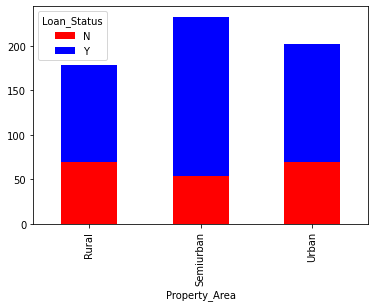

In [21]:
temp3 = pd.crosstab(data['Property_Area'], data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

I think Property area variable affect a little bit while providing loan status



---

Based on the above analysis, we can remove Married, Self_Emplyed and Gender variables

In [22]:
data = data.drop(['Married','Self_Employed','Gender'], axis = 1)

In [23]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Property_Area          0
source                 0
dtype: int64

In [24]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [25]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [26]:
data['Total_Income_log']=np.log(data['Total_Income'])
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])

In [27]:
data = data.drop(['Loan_ID','Total_Income','LoanAmount','ApplicantIncome','CoapplicantIncome'],axis = 1)

In [28]:
cat_col = ['Credit_History','Dependents','Education','Property_Area']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
  data[i] = le.fit_transform(data[i])

In [29]:
data = pd.get_dummies(data,columns=['Credit_History','Dependents','Education','Property_Area'])

In [30]:
# Split dataset in train and test set
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [31]:
X = train.drop(['source','Loan_Status'],axis = 1)
y = train['Loan_Status']

In [32]:
X_test = test.drop(['source','Loan_Status'],axis = 1)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)


**Logisitic Regression**

In [34]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# make prediction
pred_cv = model.predict(x_cv)

In [ ]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.827027027027027

In [38]:
# make prediction on test set
pred_test = model.predict(X_test)

In [39]:
ss['Loan_Status'] = pred_test
ss.to_csv('sample_submission_Loan_predict.csv', index=False)
from google.colab import files
files.download("sample_submission_Loan_predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Decision Tree**

In [40]:
# fit the model
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
# make prediction
pred_cv = model_dt.predict(x_cv)

In [ ]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.7027027027027027

In [43]:
# make prediction on test set
pred_test = model_dt.predict(X_test)

In [44]:
ss['Loan_Status'] = pred_test
ss.to_csv('sample_submission_Loan_predict.csv', index=False)
from google.colab import files
files.download("sample_submission_Loan_predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Random Forest**

In [ ]:
# fit the model
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

In [46]:
# make prediction
pred_cv = model_rf.predict(x_cv)

In [ ]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.772972972972973

In [ ]:
# make prediction on test set
pred_test = model_rf.predict(X_test)

In [49]:
ss['Loan_Status'] = pred_test
ss.to_csv('sample_submission_Loan_predict.csv', index=False)
from google.colab import files
files.download("sample_submission_Loan_predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>